# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint


## Learning Objectives


At the end of the mini-hackathon you will be able to:
* Perform Data preprocessing
* Apply different ML algorithms on the **Titanic** dataset
* Perform VotingClassifier


## Dataset Description

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of many passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

[ Data Set Link: Kaggle competition](https://www.kaggle.com/competitions/titanic)

<br/>

### Data Set Characteristics:

**PassengerId:** Id of the Passenger

**Survived:** Survived or Not information

**Pclass:** Socio-economic status (SES)
  * 1st = Upper
  * 2nd = Middle
  * 3rd = Lower

**Name:** Surname, First Names of the Passenger

**Sex:** Gender of the Passenger

**Age:** Age of the Passenger

**SibSp:**	No. of siblings/spouse of the passenger aboard the Titanic

**Parch:**	No. of parents/children of the passenger aboard the Titanic

**Ticket:**	Ticket number

**Fare:** Passenger fare

**Cabin:**	Cabin number

**Embarked:** Port of Embarkation
  * S = Southampton
  * C = Cherbourg
  * Q = Queenstown


## Problem Statement

Build a predictive model that answers the question: “what sort of people were more likely to survive?” using titanic's passenger data (ie name, age, gender, socio-economic class, etc).

In [54]:
# Check if datasets are available locally
import os
print("Checking for data files...")
if os.path.exists('titanic.csv') and os.path.exists('test_titanic.csv'):
    print("✓ All data files are available")
    print("✓ titanic.csv (training data)")
    print("✓ test_titanic.csv (test data)")
else:
    print("❌ Data files missing. Please ensure titanic.csv and test_titanic.csv are in the current directory.")
    print("You can download them using:")
    print("curl -o titanic.csv https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/titanic.csv")
    print("curl -o test_titanic.csv https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/test_titanic.csv")

Checking for data files...
✓ All data files are available
✓ titanic.csv (training data)
✓ test_titanic.csv (test data)


In [55]:
!ls

correct_age_imputation_notebook.md
correct_knn_imputation.py
notes
Practice_U1_MH1_Data_Munging.ipynb
pre_reads
test_titanic.csv
titanic.csv
transcripts
U1_MH2_Titanic_Classification_Local.ipynb
U1_MH2_Titanic_Classification.ipynb


## Exercise 1 - Load and Explore the Data (2 Marks)

* Understand different features in the training dataset
* Understand the data types of each column
* Notice the columns of missing values




#### Import Required Packages

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [57]:
# Load the dataset
train_df = pd.read_csv('titanic.csv')
print("Training dataset shape:", train_df.shape)
print("\nFirst 5 rows of training data:")
print(train_df.head())


Training dataset shape: (891, 12)

First 5 rows of training data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123 

In [58]:
# Getting information about the dataset
test_submission_df = pd.read_csv('test_titanic.csv')
print("\nTest dataset shape:", test_submission_df.shape)
print("\nFirst 5 rows of test data:")
print(test_submission_df.head())


Test dataset shape: (418, 11)

First 5 rows of test data:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [59]:
print("=== TRAINING DATASET INFO ===")
print("Dataset Info:")
print(train_df.info())
print("\nDataset Description:")
print(train_df.describe())
print("\nMissing Values:")
print(train_df.isnull().sum())
print("\nData Types:")
print(train_df.dtypes)
print("\nUnique values in each column:")
for col in train_df.columns:
    print(f"{col}: {train_df[col].nunique()} unique values")
    
# Display survival distribution
print("\nSurvival Distribution:")
print(train_df['Survived'].value_counts())
print("\nSurvival Rate:")
print(train_df['Survived'].value_counts(normalize=True))

=== TRAINING DATASET INFO ===
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Dataset Description:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838   

## Exercise 02: Split the data into train and test sets (1 Mark)
Note: Apply all your data preprocessing steps in the train set first and keep the test set aside.

In [60]:

# Import required library
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = train_df.drop('Survived', axis=1)  # Features
y = train_df['Survived']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target shape:", y_train.shape) 
print("Testing target shape:", y_test.shape)


Training set shape: (712, 11)
Testing set shape: (179, 11)
Training target shape: (712,)
Testing target shape: (179,)


## Exercise 03: Data Cleaning and Processing (15 Marks)
### 3.1 Working on the "Cabin" column (2 Marks)
Find unique entries in the Cabin column. We can label all passengers in two categories having a cabin or not. Check the data type(use: type) of each entry of the Cabin. Convert a string data type into '1' i.e. passengers with cabin and others into '0' i.e. passengers without cabin.  Write a function for the above operation and apply it to the cabin column and create another column with the name " Has_cabin" containing only 0 or 1 entries.





In [61]:
# Display unique entries in Cabin column
print("Unique entries in Cabin column:")
print(X_train['Cabin'].unique())

# Check data type of Cabin entries
print("\nData type of first Cabin entry:", type(X_train['Cabin'].iloc[0]))

# Function to convert Cabin values to binary (1 if has cabin, 0 if not)
def has_cabin(cabin):
    if pd.isna(cabin):
        return 0
    else:
        return 1

# Apply function to create Has_cabin column for both train and test sets
X_train['Has_cabin'] = X_train['Cabin'].apply(has_cabin)
X_test['Has_cabin'] = X_test['Cabin'].apply(has_cabin)

# Display value counts of Has_cabin column
print("\nDistribution of Has_cabin values in training set:")
print(X_train['Has_cabin'].value_counts())


Unique entries in Cabin column:
['C124' nan 'B58 B60' 'B38' 'C52' 'C93' 'C45' 'B20' 'B96 B98' 'C82' 'C78'
 'C106' 'C22 C26' 'B57 B59 B63 B66' 'B28' 'C104' 'F2' 'D11' 'C86' 'E38'
 'A34' 'C91' 'C68' 'F G73' 'E46' 'C92' 'E50' 'A32' 'G6' 'C128' 'E10' 'E44'
 'B41' 'B18' 'D35' 'E31' 'C2' 'C50' 'C103' 'B3' 'A10' 'C49' 'C90' 'B77'
 'C123' 'D' 'D36' 'E33' 'B5' 'A19' 'B37' 'E58' 'C23 C25 C27' 'F33' 'C7'
 'E67' 'E8' 'B22' 'B35' 'C125' 'C65' 'C54' 'B80' 'B94' 'D26' 'E121' 'E24'
 'D45' 'B101' 'B51 B53 B55' 'D17' 'D46' 'E17' 'B4' 'C46' 'A23' 'F4' 'C47'
 'E101' 'C111' 'C101' 'B82 B84' 'C70' 'C32' 'B102' 'D20' 'B71' 'A36' 'D9'
 'B50' 'D33' 'A16' 'B19' 'E12' 'C83' 'A26' 'F E69' 'A24' 'B73' 'C30' 'E40'
 'D30' 'B42' 'C99' 'C85' 'D37' 'T' 'F38' 'C118' 'B49' 'B79' 'D6' 'F G63'
 'A14' 'D49' 'C87' 'D56' 'C62 C64']

Data type of first Cabin entry: <class 'str'>

Distribution of Has_cabin values in training set:
Has_cabin
0    553
1    159
Name: count, dtype: int64


 ### 3.2 Working on "SibSp" & "Parch" columns (1 Mark)
Combine columns "SibSp" & "Parch" and create another column that represents the total passengers in one ticket with the name "family_size". In each ticket, there might be Siblings/Spouses (SibSp =Number of Siblings/Spouses Aboard) or Parents/Children (Parch=Number of Parents/Children Aboard ) along with the passenger who booked the ticket.

  

In [62]:
# Create family_size column by adding SibSp and Parch columns
X_train['family_size'] = X_train['SibSp'] + X_train['Parch']
X_test['family_size'] = X_test['SibSp'] + X_test['Parch']

# Display distribution of family sizes in training set
print("Distribution of family sizes in training set:")
print(X_train['family_size'].value_counts().sort_index())


Distribution of family sizes in training set:
family_size
0     429
1     127
2      79
3      26
4      11
5      17
6      10
7       6
10      7
Name: count, dtype: int64


### 3.3 Working on the"Embarked" column (2 Marks)
The "embarked" column represents the port of Embarkation: Cherbourg(C), Queenstown(Q), and  Southampton(S ). Thus, the entries are of three categories in this column. Fill in the missing rows in this column. We can fill it with the most frequent category. Map these categorical string entries into numerical.



In [63]:
# Check for missing values in Embarked column
print("Missing values in Embarked column:")
print(X_train['Embarked'].isnull().sum())

# Find most frequent category in Embarked
most_frequent = X_train['Embarked'].mode()[0]
print(f"\nMost frequent Embarked category: {most_frequent}")

# Fill missing values with most frequent category
X_train['Embarked'] = X_train['Embarked'].fillna(most_frequent)
X_test['Embarked'] = X_test['Embarked'].fillna(most_frequent)

# Map categorical values to numerical
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
X_train['Embarked'] = X_train['Embarked'].map(embarked_mapping)
X_test['Embarked'] = X_test['Embarked'].map(embarked_mapping)

# Display distribution after mapping
print("\nDistribution of Embarked values after mapping:")
print(X_train['Embarked'].value_counts().sort_index())


Missing values in Embarked column:
2

Most frequent Embarked category: S

Distribution of Embarked values after mapping:
Embarked
0    527
1    125
2     60
Name: count, dtype: int64


### 3.4 Working on the "Age" column (2 Marks)
find the number of NaN entries in the age column and their row index. Calculate the mean, Standard deviation of the Age column and check the distribution of the age column.We can fill the missing values with randomly generated integer values between (mean+Standard deviation, mean-Standard deviation). Use : np.isnan; np.random.randint; concept of slicing dataframe. Convert the age column as an integer data type.



=== IMPROVED KNN IMPUTATION FOR AGE ===
Before imputation - Missing Age values:
Training: 140
Test: 37

Features used for finding similar passengers: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age']

After KNN imputation - Missing Age values:
Training: 0
Test: 0


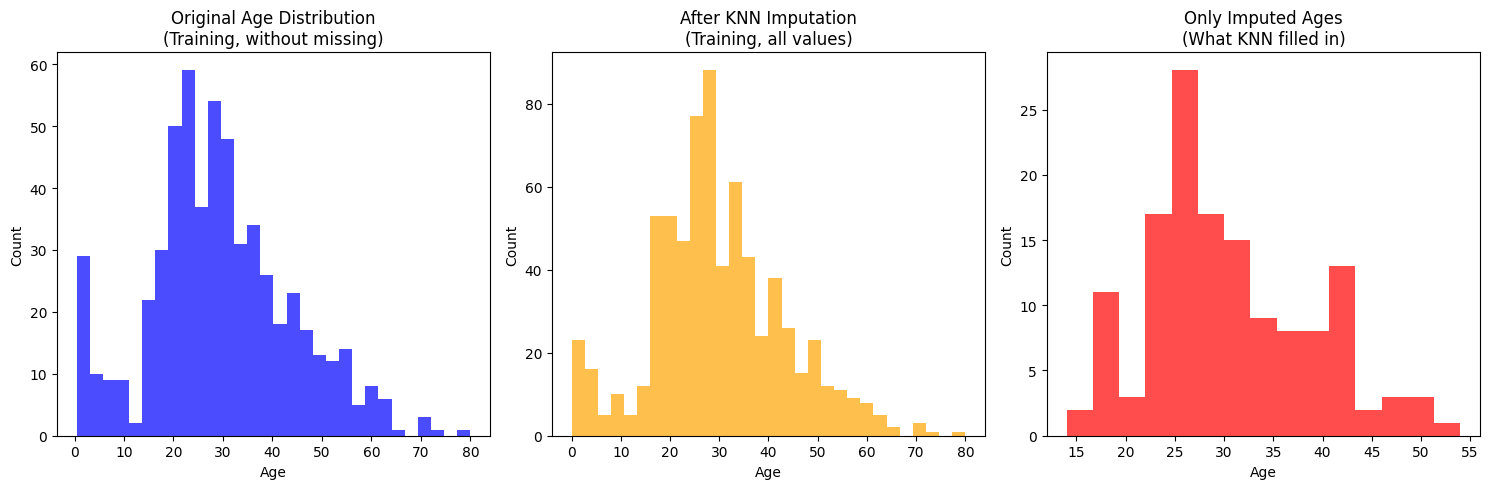


Age statistics after imputation:
count    712.000000
mean      29.655899
std       13.503591
min        0.000000
25%       22.000000
50%       28.000000
75%       37.250000
max       80.000000
Name: Age, dtype: float64


In [64]:
# Improved KNN Imputation using multiple features
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

print("=== IMPROVED KNN IMPUTATION FOR AGE ===")

# Prepare features for KNN imputation
# We'll use multiple features to find similar passengers
features_for_knn = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age']

# Create temporary datasets for imputation
train_for_imputation = X_train[features_for_knn].copy()
test_for_imputation = X_test[features_for_knn].copy()

print(f"Before imputation - Missing Age values:")
print(f"Training: {train_for_imputation['Age'].isnull().sum()}")
print(f"Test: {test_for_imputation['Age'].isnull().sum()}")

# Encode categorical variables for KNN
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

# Handle Sex column
train_for_imputation['Sex'] = le_sex.fit_transform(train_for_imputation['Sex'])
test_for_imputation['Sex'] = le_sex.transform(test_for_imputation['Sex'])

# Handle Embarked column (fill missing values first)
train_mode_embarked = train_for_imputation['Embarked'].mode()[0]
train_for_imputation = train_for_imputation.fillna({'Embarked': train_mode_embarked})
test_for_imputation = test_for_imputation.fillna({'Embarked': train_mode_embarked})

train_for_imputation['Embarked'] = le_embarked.fit_transform(train_for_imputation['Embarked'])
test_for_imputation['Embarked'] = le_embarked.transform(test_for_imputation['Embarked'])

# Handle Fare column (fill missing values if any)
train_median_fare = train_for_imputation['Fare'].median()
train_for_imputation = train_for_imputation.fillna({'Fare': train_median_fare})
test_for_imputation = test_for_imputation.fillna({'Fare': train_median_fare})

print(f"\nFeatures used for finding similar passengers: {list(train_for_imputation.columns)}")

# Apply KNN Imputation
imputer = KNNImputer(n_neighbors=5)

# Fit on training data and transform both
train_imputed = imputer.fit_transform(train_for_imputation)
test_imputed = imputer.transform(test_for_imputation)

# Convert back to DataFrames
train_imputed_df = pd.DataFrame(train_imputed, columns=train_for_imputation.columns, index=train_for_imputation.index)
test_imputed_df = pd.DataFrame(test_imputed, columns=test_for_imputation.columns, index=test_for_imputation.index)

# Update the Age column in original datasets
X_train['Age'] = train_imputed_df['Age'].round().astype(int)
X_test['Age'] = test_imputed_df['Age'].round().astype(int)

print(f"\nAfter KNN imputation - Missing Age values:")
print(f"Training: {X_train['Age'].isnull().sum()}")
print(f"Test: {X_test['Age'].isnull().sum()}")

# Plot comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(train_for_imputation['Age'].dropna(), bins=30, alpha=0.7, color='blue')
plt.title('Original Age Distribution\n(Training, without missing)')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(X_train['Age'], bins=30, alpha=0.7, color='orange')
plt.title('After KNN Imputation\n(Training, all values)')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
# Show only imputed values
original_missing = train_for_imputation['Age'].isnull()
if original_missing.sum() > 0:
    imputed_ages = X_train.loc[original_missing, 'Age']
    plt.hist(imputed_ages, bins=15, alpha=0.7, color='red')
    plt.title('Only Imputed Ages\n(What KNN filled in)')
    plt.xlabel('Age')
    plt.ylabel('Count')
else:
    plt.text(0.5, 0.5, 'No missing ages', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('No Missing Ages to Impute')

plt.tight_layout()
plt.show()

print("\nAge statistics after imputation:")
print(X_train['Age'].describe())

### 3.5 Working on "sex" column (1 Mark)
Map the Sex column as 'female' : 0, 'male': 1, and convert it into an integer data type.



In [65]:
# Map sex values and convert to integer
sex_mapping = {'female': 0, 'male': 1}
X_train['Sex'] = X_train['Sex'].map(sex_mapping).astype(int)
X_test['Sex'] = X_test['Sex'].map(sex_mapping).astype(int)

print("\nSex column after mapping:")
print(X_train['Sex'].value_counts())



Sex column after mapping:
Sex
1    467
0    245
Name: count, dtype: int64


### 3.6  Optional- Working on the "Name" column :
Fetch titles from the name. We can map these titles with numbers and convert them into an integer. Use: concept of the regular expression.

### 3.7 Optional- Working on the "Fare" column :
We can convert face into categorical entries like Low, Medium, and High.



In [66]:
# Extract titles from Name using regex
X_train['Title'] = X_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
X_test['Title'] = X_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Map titles to numbers
title_mapping = {
    'Mr': 1,
    'Miss': 2,
    'Mrs': 3,
    'Master': 4,
    'Dr': 5,
    'Rev': 5,
    'Col': 5,
    'Major': 5,
    'Mlle': 2,
    'Countess': 3,
    'Ms': 2,
    'Lady': 3,
    'Jonkheer': 1,
    'Don': 1,
    'Dona': 3,
    'Mme': 3,
    'Capt': 5,
    'Sir': 5
}

X_train['Title'] = X_train['Title'].map(title_mapping)
X_test['Title'] = X_test['Title'].map(title_mapping)

print("\nTitle distribution after mapping:")
print(X_train['Title'].value_counts())

# Convert Fare to categories
def categorize_fare(fare):
    if fare <= 17:
        return 0  # Low
    elif fare <= 30:
        return 1  # Medium
    else:
        return 2  # High

X_train['Fare'] = X_train['Fare'].apply(categorize_fare)
X_test['Fare'] = X_test['Fare'].apply(categorize_fare)

print("\nFare categories distribution:")
print(X_train['Fare'].value_counts())



Title distribution after mapping:
Title
1    419
2    146
3     99
4     33
5     15
Name: count, dtype: int64

Fare categories distribution:
Fare
0    400
2    182
1    130
Name: count, dtype: int64


### 3.8 Drop the columns (1 Mark)

Drop the columns: - "PassengerId", "Name",  "SibSp" & "Parch", "Tickets", "Cabin"

Now apply different ML algorithms and check the accuracy of your model.



In [67]:
# Drop unnecessary columns
columns_to_drop = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

print("\nRemaining columns after dropping:")
print(X_train.columns.tolist())



Remaining columns after dropping:
['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Has_cabin', 'family_size', 'Title']


### 3.9 Apply Standard Scalar (1 Mark)

In [68]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Convert back to DataFrame to maintain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

print("\nScaled features statistics:")
print(X_train_scaled.describe().round(2))



Scaled features statistics:
       Pclass     Sex     Age    Fare  Embarked  Has_cabin  family_size  \
count  712.00  712.00  712.00  712.00    712.00     712.00       712.00   
mean     0.00   -0.00    0.00    0.00     -0.00       0.00         0.00   
std      1.00    1.00    1.00    1.00      1.00       1.00         1.00   
min     -1.61   -1.38   -2.20   -0.82     -0.55      -0.54        -0.55   
25%     -0.40   -1.38   -0.57   -0.82     -0.55      -0.54        -0.55   
50%      0.81    0.72   -0.12   -0.82     -0.55      -0.54        -0.55   
75%      0.81    0.72    0.56    1.54      1.04      -0.54         0.04   
max      0.81    0.72    3.73    1.54      2.64       1.86         5.39   

        Title  
count  712.00  
mean    -0.00  
std      1.00  
min     -0.70  
25%     -0.70  
50%     -0.70  
75%      0.29  
max      3.27  


### 3.10 Create a single function for preprocessing the test set (X_test) and apply it. (4 Marks)
#### **Note**: All the pre-processing steps that were applied on the train set before ML Modelling are also applied on the test set before passing through the predict function.

In [69]:
## Create a function
def preprocess_data_consistent(df, is_training=True, mean_age=None, std_age=None, mode_embarked=None):
    """
    Consistent preprocessing function for both training and test data
    """
    # Make a copy to avoid modifying original data
    df_processed = df.copy()
    
    # 1. Handle Cabin column - create Has_cabin
    def has_cabin(cabin):
        if pd.isna(cabin):
            return 0
        else:
            return 1
    
    df_processed['Has_cabin'] = df_processed['Cabin'].apply(has_cabin)
    
    # 2. Create family_size (SibSp + Parch + 1 for the passenger themselves)
    df_processed['family_size'] = df_processed['SibSp'] + df_processed['Parch'] + 1
    
    # 3. Handle Embarked column consistently
    if is_training:
        # For training data, calculate the mode
        mode_embarked = df_processed['Embarked'].mode()[0]
    
    # Fill missing values with mode - use proper pandas syntax
    df_processed = df_processed.fillna({'Embarked': mode_embarked})
    
    # Map embarked to numerical values (NOT one-hot encoding)
    embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
    df_processed['Embarked'] = df_processed['Embarked'].map(embarked_mapping)
    
    # 4. Handle Age column consistently
    if is_training:
        # For training data, calculate mean and std
        mean_age = df_processed['Age'].mean()
        std_age = df_processed['Age'].std()
    
    # Fill missing ages with random values between mean-std and mean+std
    age_null_indices = df_processed['Age'].isnull()
    age_null_count = age_null_indices.sum()
    
    if age_null_count > 0:
        random_ages = np.random.randint(
            int(mean_age - std_age), 
            int(mean_age + std_age), 
            size=age_null_count
        )
        df_processed.loc[age_null_indices, 'Age'] = random_ages
    
    # Convert Age to integer
    df_processed['Age'] = df_processed['Age'].astype(int)
    
    # 5. Handle Sex column
    sex_mapping = {'female': 0, 'male': 1}
    df_processed['Sex'] = df_processed['Sex'].map(sex_mapping)
    
    # 6. Handle missing Fare values (if any)
    if df_processed['Fare'].isnull().any():
        df_processed = df_processed.fillna({'Fare': df_processed['Fare'].median()})
    
    # 7. Drop unnecessary columns
    columns_to_drop = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']
    df_processed = df_processed.drop(columns_to_drop, axis=1)
    
    return df_processed, mean_age, std_age, mode_embarked
# Apply preprocessing function to X_test
train_df = pd.read_csv('titanic.csv')
print("Training dataset shape:", train_df.shape)
print("\nFirst 5 rows of training data:")
print(train_df.head())

# Separate features and target
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess training data
X_train_processed, mean_age, std_age, mode_embarked = preprocess_data_consistent(
    X_train, is_training=True
)

# Preprocess test data using same parameters
X_test_processed, _, _, _ = preprocess_data_consistent(
    X_test, 
    is_training=False, 
    mean_age=mean_age, 
    std_age=std_age, 
    mode_embarked=mode_embarked
)

print("After preprocessing:")
print("Training data shape:", X_train_processed.shape)
print("Test data shape:", X_test_processed.shape)
print("Training columns:", list(X_train_processed.columns))
print("Test columns:", list(X_test_processed.columns))

# Verify columns match
if list(X_train_processed.columns) == list(X_test_processed.columns):
    print("✅ Columns match! Preprocessing is consistent.")
else:
    print("❌ Columns don't match!")


Training dataset shape: (891, 12)

First 5 rows of training data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123 

In [70]:
## Applyting above function



### 3.11 Apply standard Scalar transformation to x_test (1 Mark)

In [71]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_processed), 
    columns=X_train_processed.columns
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_processed), 
    columns=X_test_processed.columns
)

print("After scaling:")
print("Training data shape:", X_train_scaled.shape)
print("Test data shape:", X_test_scaled.shape)

After scaling:
Training data shape: (712, 7)
Test data shape: (179, 7)


## Exercise  4. Apply Multiple ML Algorithm and display the accuracy. (7 Marks)
 * Optional (  Ensemble Technique )
#### Expected Accuracy >= 80%  


Logistic Regression Accuracy: 0.8156
Random Forest Accuracy: 0.7989
Decision Tree Accuracy: 0.8212
KNN Accuracy: 0.7877
SVM Accuracy: 0.8156


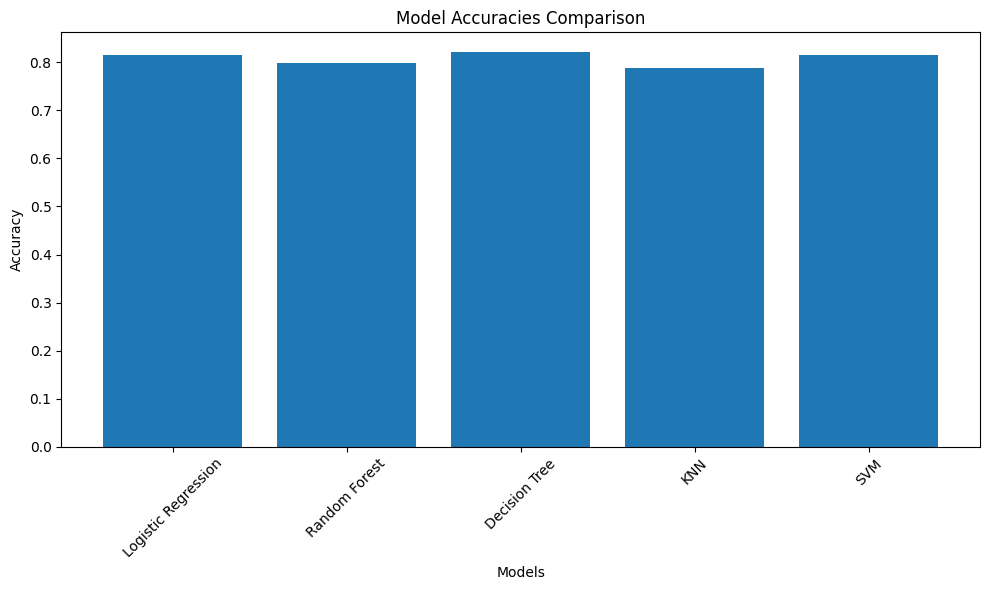


Best performing model: Decision Tree with accuracy: 0.8212


In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.4f}")

# Create bar plot of accuracies
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('Model Accuracies Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find best performing model
best_model_name = max(results, key=results.get)
print(f"\nBest performing model: {best_model_name} with accuracy: {results[best_model_name]:.4f}")



## Exercise  5. Pre-process the test_set (3 Marks)
Again we have to apply the same preprocess function and standard scaler on this test set before passing through predict function.

#### Understanding the test set:

#### Note: In the initial train set there were no missing entries in the "Fare" column. But, now for the submission test set, there is one missing entry in this column.

#### There will be a minor change in the preprocess function to address the above issue.

## Exercise  6. Prediction for test data (2 Mark)